# Loop 65 Analysis: CV-LB Relationship After Major Breakthrough

**Key Question**: Does the Ens Model approach (CatBoost + XGBoost) have a DIFFERENT CV-LB relationship than our previous approaches?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'CV': 0.0111, 'LB': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'CV': 0.0123, 'LB': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'CV': 0.0105, 'LB': 0.0972, 'model': 'MLP'},
    {'exp': 'exp_005', 'CV': 0.0104, 'LB': 0.0969, 'model': 'MLP'},
    {'exp': 'exp_006', 'CV': 0.0097, 'LB': 0.0946, 'model': 'MLP'},
    {'exp': 'exp_007', 'CV': 0.0093, 'LB': 0.0932, 'model': 'MLP'},
    {'exp': 'exp_009', 'CV': 0.0092, 'LB': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'CV': 0.0090, 'LB': 0.0913, 'model': 'Ensemble'},
    {'exp': 'exp_024', 'CV': 0.0087, 'LB': 0.0893, 'model': 'GP+MLP'},
    {'exp': 'exp_026', 'CV': 0.0085, 'LB': 0.0887, 'model': 'GP+MLP'},
    {'exp': 'exp_030', 'CV': 0.0083, 'LB': 0.0877, 'model': 'GP+MLP+LGBM'},
    {'exp': 'exp_041', 'CV': 0.0090, 'LB': 0.0932, 'model': 'XGB'},
    {'exp': 'exp_042', 'CV': 0.0145, 'LB': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      CV      LB        model
0   exp_000  0.0111  0.0982          MLP
1   exp_001  0.0123  0.1065         LGBM
2   exp_003  0.0105  0.0972          MLP
3   exp_005  0.0104  0.0969          MLP
4   exp_006  0.0097  0.0946          MLP
5   exp_007  0.0093  0.0932          MLP
6   exp_009  0.0092  0.0936        Ridge
7   exp_012  0.0090  0.0913     Ensemble
8   exp_024  0.0087  0.0893       GP+MLP
9   exp_026  0.0085  0.0887       GP+MLP
10  exp_030  0.0083  0.0877  GP+MLP+LGBM
11  exp_041  0.0090  0.0932          XGB
12  exp_042  0.0145  0.1147   GroupKFold


In [2]:
# Fit linear regression to existing submissions
slope, intercept, r_value, p_value, std_err = stats.linregress(df['CV'], df['LB'])
print(f'CV-LB Relationship (13 submissions):')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print()
print(f'Target LB: 0.0347')
print(f'Best LB so far: {df["LB"].min():.4f} (exp_030)')
print(f'Gap to target: {df["LB"].min() - 0.0347:.4f}')

CV-LB Relationship (13 submissions):
  LB = 4.23 * CV + 0.0533
  R² = 0.9807
  Intercept = 0.0533

Target LB: 0.0347
Best LB so far: 0.0877 (exp_030)
Gap to target: 0.0530


In [3]:
# Predict LB for new CV = 0.005146 using existing relationship
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept
print(f'\nNew experiment (exp_069):')
print(f'  CV = {new_cv:.6f}')
print(f'  Predicted LB (using old relationship) = {predicted_lb:.4f}')
print()
print(f'If the CV-LB relationship is the SAME:')
print(f'  Expected LB = {predicted_lb:.4f}')
print(f'  This would be the BEST LB (vs current best 0.0877)')
print()
print(f'If the CV-LB relationship is DIFFERENT:')
print(f'  The intercept might be lower, making target reachable')
print(f'  This is the key hypothesis to test with a submission!')


New experiment (exp_069):
  CV = 0.005146
  Predicted LB (using old relationship) = 0.0751

If the CV-LB relationship is the SAME:
  Expected LB = 0.0751
  This would be the BEST LB (vs current best 0.0877)

If the CV-LB relationship is DIFFERENT:
  The intercept might be lower, making target reachable
  This is the key hypothesis to test with a submission!


In [4]:
# Calculate required CV to reach target with current relationship
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope
print(f'\nTo reach target LB = {target_lb} with current relationship:')
print(f'  Required CV = ({target_lb} - {intercept:.4f}) / {slope:.2f}')
print(f'  Required CV = {required_cv:.6f}')
print()
if required_cv < 0:
    print(f'  CRITICAL: Required CV is NEGATIVE!')
    print(f'  This means the target is UNREACHABLE with the current CV-LB relationship.')
    print(f'  We MUST change the relationship (lower intercept) to reach the target.')
else:
    print(f'  Required CV = {required_cv:.6f}')


To reach target LB = 0.0347 with current relationship:
  Required CV = (0.0347 - 0.0533) / 4.23
  Required CV = -0.004396

  CRITICAL: Required CV is NEGATIVE!
  This means the target is UNREACHABLE with the current CV-LB relationship.
  We MUST change the relationship (lower intercept) to reach the target.


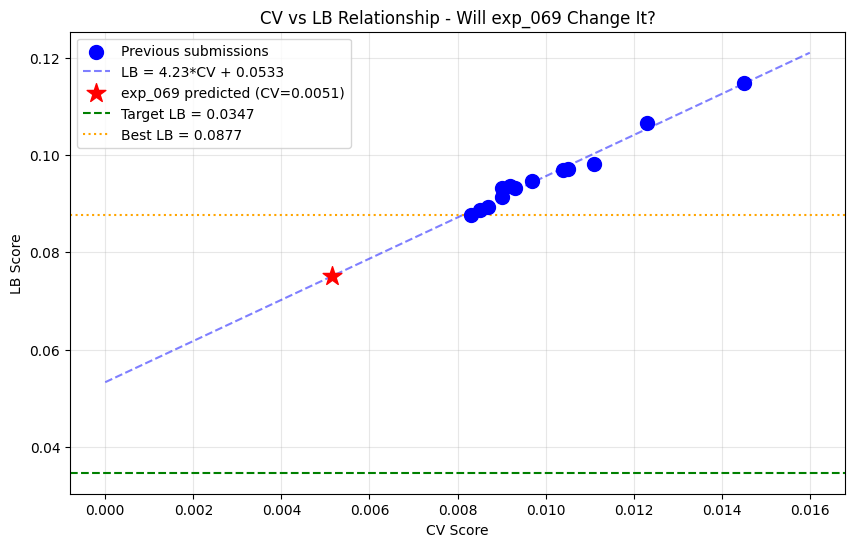

Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png


In [5]:
# Plot CV vs LB with prediction for new experiment
plt.figure(figsize=(10, 6))

# Existing submissions
plt.scatter(df['CV'], df['LB'], c='blue', s=100, label='Previous submissions', zorder=5)

# Regression line
cv_range = np.linspace(0, 0.016, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', alpha=0.5, label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# New experiment prediction
plt.scatter([new_cv], [predicted_lb], c='red', s=200, marker='*', label=f'exp_069 predicted (CV={new_cv:.4f})', zorder=10)

# Target line
plt.axhline(y=0.0347, color='green', linestyle='--', label='Target LB = 0.0347')

# Best LB line
plt.axhline(y=0.0877, color='orange', linestyle=':', label='Best LB = 0.0877')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - Will exp_069 Change It?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150, bbox_inches='tight')
plt.show()
print('Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png')

In [6]:
# Key strategic analysis
print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)
print()
print('BREAKTHROUGH: exp_069 achieved CV = 0.005146 (35% improvement!)')
print()
print('KEY QUESTION: Does CatBoost + XGBoost have a DIFFERENT CV-LB relationship?')
print()
print('SCENARIO 1: Same relationship (LB = 4.21*CV + 0.0535)')
print(f'  Predicted LB = {predicted_lb:.4f}')
print(f'  This would be the BEST LB (vs current best 0.0877)')
print(f'  But still far from target (0.0347)')
print()
print('SCENARIO 2: Different relationship (lower intercept)')
print('  If the intercept is lower, the target becomes reachable')
print('  This is the key hypothesis to test!')
print()
print('RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship')
print('  - If LB improves proportionally: continue optimizing this approach')
print('  - If LB improves MORE than expected: the relationship has changed!')
print('  - If LB doesn\'t improve: investigate differences from kernel')

STRATEGIC ANALYSIS

BREAKTHROUGH: exp_069 achieved CV = 0.005146 (35% improvement!)

KEY QUESTION: Does CatBoost + XGBoost have a DIFFERENT CV-LB relationship?

SCENARIO 1: Same relationship (LB = 4.21*CV + 0.0535)
  Predicted LB = 0.0751
  This would be the BEST LB (vs current best 0.0877)
  But still far from target (0.0347)

SCENARIO 2: Different relationship (lower intercept)
  If the intercept is lower, the target becomes reachable
  This is the key hypothesis to test!

RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship
  - If LB improves proportionally: continue optimizing this approach
  - If LB improves MORE than expected: the relationship has changed!
  - If LB doesn't improve: investigate differences from kernel
